In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv('DataSet5_2.csv', sep = ',')
df.head()

,count,holiday,humidity,registered,summer,temp,windspeed,workingday
0,2,0,81,2,0,10.66,22.0028,1
1,157,0,54,150,1,18.04,16.9979,1
2,233,0,40,199,1,37.72,15.0013,1
3,98,0,88,86,1,22.14,19.0012,1
4,6,0,74,6,0,6.56,6.0032,1


In [6]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]


X_train = train_data[['holiday', 'humidity', 'registered', 'summer',
                 'temp', 'windspeed', 'workingday']]
y_train = train_data['count']
X_test = test_data[['holiday', 'humidity', 'registered', 'summer',
                 'temp', 'windspeed', 'workingday']]
y_test = test_data['count']

# Обучение модели линейной регрессии
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Прогноз на тестовом наборе
y_pred = regression_model.predict(X_test)

# Оценка производительности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 770.3191731155879
Коэффициент детерминации (R^2): 0.9484470510515262


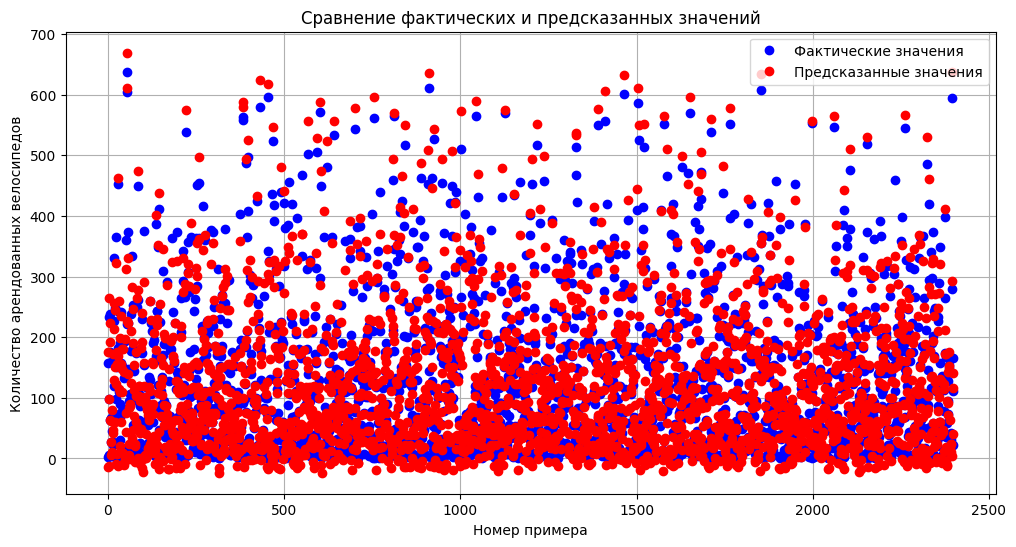

2400 2400


In [7]:
# Создаем фигуру и оси для графика
fig, ax = plt.subplots(figsize=(12, 6))


pred = regression_model.predict(X_train)
# Данные
actual_values = y_train  # Фактические значения
predicted_values = pred  # Предсказанные значения

# Создание графика для фактических и предсказанных значений
plt.plot(actual_values, 'bo', label='Фактические значения')
plt.plot(predicted_values, 'ro', label='Предсказанные значения')

# Настройка графика
plt.title('Сравнение фактических и предсказанных значений')
plt.xlabel('Номер примера')
plt.ylabel('Количество арендованных велосипедов')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()

print(len(X_train), len(y_train))
